In [3]:
import librosa
import matplotlib.pyplot as plt
import librosa.display
import numpy as np
import os

In [6]:
y, sr = librosa.load('do.wav',44100)
D = librosa.stft(y)

In [8]:
D.shape

(1025, 431)

In [4]:
each_feq = 44100/1024
# 最小的那个阈值
yu1 = 246 // each_feq
# 最大的那个阈值
yu2 = 2489 // each_feq
def Denoise(filname):
    y, sr = librosa.load(filname,44100)
#     # 得到短时傅里叶
#     D = librosa.stft(y)
#     # 进行处理
#     for i in range(len(D)):
#         if i < yu1 or i > yu2:
#             D[i][D[i]< 1000] = 0
#     # 再转回来
#     n = len(y)
#     y_out = librosa.istft(D, length=n)
    y_out = y
    # 先正着取非0
    index_0 = (y_out!=0).argmax(axis=0)
    yreverse = y_out[index_0:].tolist()
    # 反转后再取非0
    yreverse.reverse()
    yreverse = np.array(yreverse)
    index_0 = (yreverse>0.001).argmax(axis=0)
    yreverse = yreverse[index_0:]
    yreverse = yreverse.tolist()
    # 再转回来，返回
    yreverse.reverse()
    y_out = np.array(yreverse)
    
    return y_out,sr

def Makepianofiles():
    pathname = 'piano_wav'
    path = './'+pathname+'/'
    for file in os.listdir(path):
        if 'wav'in file:
            y_out,sr = Denoise(path+file)
            librosa.output.write_wav('./piano_inuse/'+file, y_out, sr)
    
    
    

In [5]:
Makepianofiles()

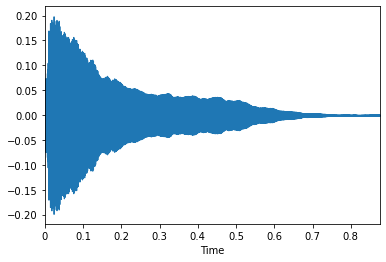

In [61]:
y_out,sr = Denoise('do.wav')
librosa.display.waveplot(y_out, sr=sr)

In [62]:
librosa.output.write_wav('do_.wav', y_out, sr)

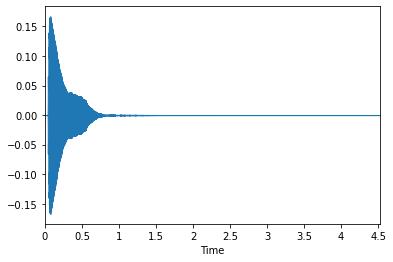

In [26]:
import numpy as np
index_0 = (y_out!=0).argmax(axis=0)
librosa.display.waveplot(y_out[index_0:], sr=sr)


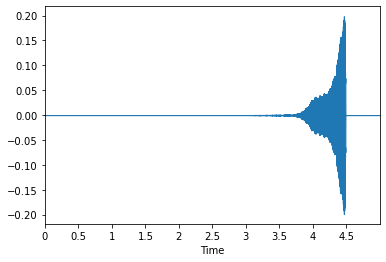

In [45]:
y2d = np.array([y])
librosa.display.waveplot(, sr=sr)

In [32]:
y_ = np.fliplr(y2d)[0]

In [31]:
y

array([0., 0., 0., ..., 0., 0., 0.], dtype=float32)

In [42]:
yreverse = y.tolist()

In [43]:
yreverse.reverse()

In [44]:
len(yreverse)

220500

In [46]:
yreverse = np.array(yreverse)

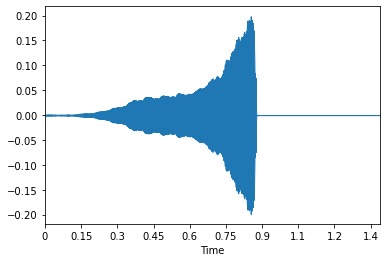

In [53]:
index_1 = (yreverse>0.001).argmax(axis=0)
librosa.display.waveplot(yreverse[index_1:], sr=sr)